In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import cv2
from tensorflow.keras import backend
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model, load_model
from keras.layers import Conv2D, Input, MaxPooling2D, BatchNormalization, Dense, Flatten
print(tf.__version__)

2.1.0


Using TensorFlow backend.


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

In [3]:
for_hold = trainX.copy()

for i in range(trainX.shape[0]):
    for_hold[i] = cv2.flip(trainX[i], np.random.randint(-1,3))

trainX = for_hold.copy()

In [4]:
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [5]:
trainX = trainX/255.0
testX = testX/255.0

In [6]:
#input tensor initialisation
input_img = keras.layers.Input((28, 28, 1), name = "img")
n_filters = 16

In [7]:
# def make_model(input_img, n_filters = 16):
c1 = keras.layers.Conv2D(n_filters, (3,3), padding='same', activation='relu', input_shape = (28,28,1))(input_img)
p1 = keras.layers.MaxPooling2D((2,2))(c1)

c2 = keras.layers.Conv2D(n_filters*4, (3,3), padding='same', activation='relu')(p1)
p2 = keras.layers.MaxPooling2D((2,2))(c2)

c3 = keras.layers.Conv2D(n_filters*4, (3,3), padding='same', activation='relu')(p2)
flat = keras.layers.Flatten()
flattened = flat(c3)
d1 = keras.layers.Dense(64, activation='relu')(flattened)
d2 = keras.layers.Dense(10, activation='softmax')(d1)
model = Model(inputs=[input_img], outputs=[d2])
model.compile(optimizer = 'Adam', loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0     

In [9]:
history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 24s 406us/sample - loss: 0.4158 - accuracy: 0.8489 - val_loss: 0.3266 - val_accuracy: 0.8872
Epoch 2/10
60000/60000 [==============================] - 26s 431us/sample - loss: 0.2684 - accuracy: 0.9021 - val_loss: 0.2748 - val_accuracy: 0.8970
Epoch 3/10
60000/60000 [==============================] - 26s 438us/sample - loss: 0.2258 - accuracy: 0.9166 - val_loss: 0.2564 - val_accuracy: 0.9076
Epoch 4/10
60000/60000 [==============================] - 26s 432us/sample - loss: 0.1952 - accuracy: 0.9283 - val_loss: 0.2555 - val_accuracy: 0.9055
Epoch 5/10
60000/60000 [==============================] - 26s 426us/sample - loss: 0.1705 - accuracy: 0.9373 - val_loss: 0.2550 - val_accuracy: 0.9101
Epoch 6/10
60000/60000 [==============================] - 25s 423us/sample - loss: 0.1481 - accuracy: 0.9451 - val_loss: 0.2754 - val_accuracy: 0.9094
Epoch 7/10
60000/60000 [====================

60000/60000 - 6s - loss: 0.0752 - accuracy: 0.9723


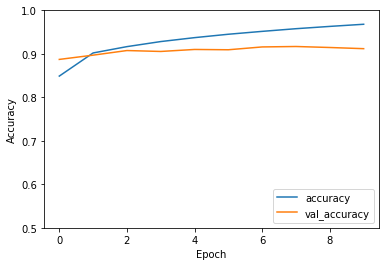

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(trainX, trainY, verbose=2)
